In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import matplotlib.dates as mdates

In [2]:
stocks = ["AMZN","TSLA","GOOGL"]
data_dict = {} #holding the data

for ticker in stocks:
    df = yf.download(ticker, period="3y", interval="1d")
    df.reset_index(inplace = True) 
    data_dict[ticker] = df
    print(f"\n{ticker} data (first 10 rows)")
    print(df.head(10))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



AMZN data (first 10 rows)
Price        Date       Close        High         Low        Open     Volume
Ticker                   AMZN        AMZN        AMZN        AMZN       AMZN
0      2022-02-22  150.197495  152.982498  148.485504  150.478500   66128000
1      2022-02-23  144.826996  151.763000  144.651001  151.650497   64244000
2      2022-02-24  151.358002  151.748993  139.500000  139.837494  100786000
3      2022-02-25  153.788498  153.990005  149.213501  150.550003   62396000
4      2022-02-28  153.563004  154.449997  150.850006  152.425003   57684000
5      2022-03-01  151.141998  154.098999  149.977005  152.732498   44874000
6      2022-03-02  152.052505  152.999496  148.750000  150.848999   47334000
7      2022-03-03  147.898499  153.929001  146.856003  153.531494   65198000
8      2022-03-04  145.641006  147.850006  143.807007  147.158997   60934000
9      2022-03-07  137.453003  146.094498  137.416504  145.443497   86934000

TSLA data (first 10 rows)
Price        Date     

[*********************100%***********************]  1 of 1 completed


GOOGL data (first 10 rows)
Price        Date       Close        High         Low        Open    Volume
Ticker                  GOOGL       GOOGL       GOOGL       GOOGL     GOOGL
0      2022-02-22  129.344620  131.703059  127.760351  129.369022  44990000
1      2022-02-23  127.127151  131.574029  127.066869  131.172986  32786000
2      2022-02-24  132.211716  132.519605  124.502168  124.502168  54456000
3      2022-02-25  133.973846  134.782910  131.275620  133.069623  36406000
4      2022-02-28  134.569183  135.261163  132.113577  132.569429  38864000
5      2022-03-01  133.577271  135.763346  132.737328  134.391321  26496000
6      2022-03-02  134.085434  134.773932  132.590852  134.141733  23520000
7      2022-03-03  133.415863  135.946682  132.545012  135.518729  24604000
8      2022-03-04  131.430038  133.368020  129.866706  132.447362  30430000
9      2022-03-07  125.922028  131.259179  125.838825  131.013077  45112000


In [3]:
#RSI Calculation - Relative Strength Index
def calculate_RSI(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower = 0)
    loss = -1 * delta.clip(upper = 0)

    avg_gain = gain.rolling(window = period, min_periods = period).mean()
    avg_loss = loss.rolling(window = period, min_periods = period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100/(1 + rs))
    return rsi
#RSI > 70 -> Overbought, chance of price going down
#RSI < 30 -> Oversold, chance of price going up

In [4]:
def compute_technical_indicators(df):
    # Trend Indicator
    df['SMA_20'] = df['Close'].rolling(window = 20).mean()
    df['EMA_20'] = df['Close'].ewm(span = 20, adjust = False).mean()
    
    # Momentum Indicator
    df['RSI_14'] = calculate_RSI(df['Close'], period = 14)

    # Volatility Indicator: Bollinger Bands 
    df['Std_20'] = (
        df['Close'].rolling(window=20).std()
    )
    df['Upper_BB'] = df['SMA_20'] + (2 * df['Std_20'])
    df['Lower_BB'] = df['SMA_20'] - (2 * df['Std_20'])

    # MACD Calculation
    df['EMA_12'] = df['Close'].ewm(span = 12, adjust = False).mean()
    df['EMA_26'] = df['Close'].ewm(span = 26, adjust = False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_Signal'] =df['MACD'].ewm(span=9, adjust = False).mean()

    # Return analysis and volatility
    df['Return'] = df['Close'].pct_change()
    df['Volatility_20'] = df['Return'].rolling(window=20).std()

    #Drop NaN values
    df.dropna(inplace=True)
    # print("\n Data: \n")
    return df

In [5]:
stocks = ["AMZN","TSLA","GOOGL"]
data_dict = {} #holding the data

for ticker in stocks:
    df = yf.download(ticker, period="3y", interval="1d")
    df.reset_index(inplace = True) 
    # Compute technical indicators
    df = compute_technical_indicators(df)
    data_dict[ticker] = df
    # print(f"\n{ticker} data (first 10 rows)")
    # print(df.head(10))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
data_dict['AMZN']

Price,Date,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI_14,Std_20,Upper_BB,Lower_BB,EMA_12,EMA_26,MACD,MACD_Signal,Return,Volatility_20
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN,,,,,,,,,,,,
20,2022-03-22,164.889008,166.167007,161.699005,161.805496,64086000,149.627627,151.768579,61.703266,7.932578,165.492783,133.762471,153.861714,151.115229,2.746484,0.382721,0.021038,0.029611
21,2022-03-23,163.408005,166.369995,162.686996,163.705002,55812000,150.556677,152.877095,64.864810,8.414211,167.385100,133.728254,155.330374,152.025805,3.304568,0.967091,-0.008982,0.028240
22,2022-03-24,163.649506,164.118500,160.050003,163.749496,56798000,151.171252,153.903039,67.953725,8.910095,168.991443,133.351062,156.610240,152.886820,3.723420,1.518357,0.001478,0.026742
23,2022-03-25,164.773499,165.368500,162.250000,164.000000,49032000,151.720502,154.938321,81.702746,9.404768,170.530039,132.910966,157.866126,153.767315,4.098811,2.034448,0.006868,0.026607
24,2022-03-28,168.990494,169.037506,164.899994,164.975006,59854000,152.491877,156.276623,85.947396,10.165735,172.823347,132.160407,159.577567,154.894958,4.682610,2.564080,0.025593,0.027010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2025-02-14,228.679993,229.889999,227.229996,229.199997,27031100,234.119998,231.771471,42.295376,4.101067,242.322132,225.917864,232.259379,230.823248,1.436132,2.848080,-0.007336,0.016463
749,2025-02-18,226.649994,229.300003,223.720001,228.820007,42975100,234.155498,231.283712,36.640337,4.028972,242.213442,226.097554,231.396397,230.514118,0.882279,2.454920,-0.008877,0.015775
750,2025-02-19,226.630005,226.830002,223.710007,225.520004,28566700,233.951498,230.840501,37.565508,4.306354,242.564206,225.338790,230.663106,230.226406,0.436700,2.051276,-0.000088,0.014994


In [7]:
def plot_technical_analysis(df, ticker):
    plt.figure(figsize = (20,8))
    plt.plot(df['Date'], df['Close'], label="Close Price", color="black")
    plt.plot(df['Date'], df['SMA_20'], label="20-Day SMA", color="blue", linestyle = "--")
    plt.plot(df['Date'], df['EMA_20'], label="20-Day EMA", color="red", linestyle = "--")
    plt.plot(df['Date'], df['Upper_BB'], label="Upper Bollinger Band", color="green", linestyle = ":")
    plt.plot(df['Date'], df['Lower_BB'], label="Lower Bollinger Band", color="orange", linestyle = ":")

    plt.title(f"{ticker} Technical Analysis")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
  

In [8]:
stocks = ["AMZN","TSLA","GOOGL"]
data_dict = {} #holding the data

for ticker in stocks:
    df = yf.download(ticker, period="3y", interval="1d")
    df.reset_index(inplace = True) 
    # Compute technical indicators
    df = compute_technical_indicators(df)
    data_dict[ticker] = df
    # print(f"\n{ticker} data (first 10 rows)")
    # print(df.head(10))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
tsla_df = data_dict['TSLA']
amzn_df = data_dict['AMZN']
googl_df = data_dict['GOOGL']

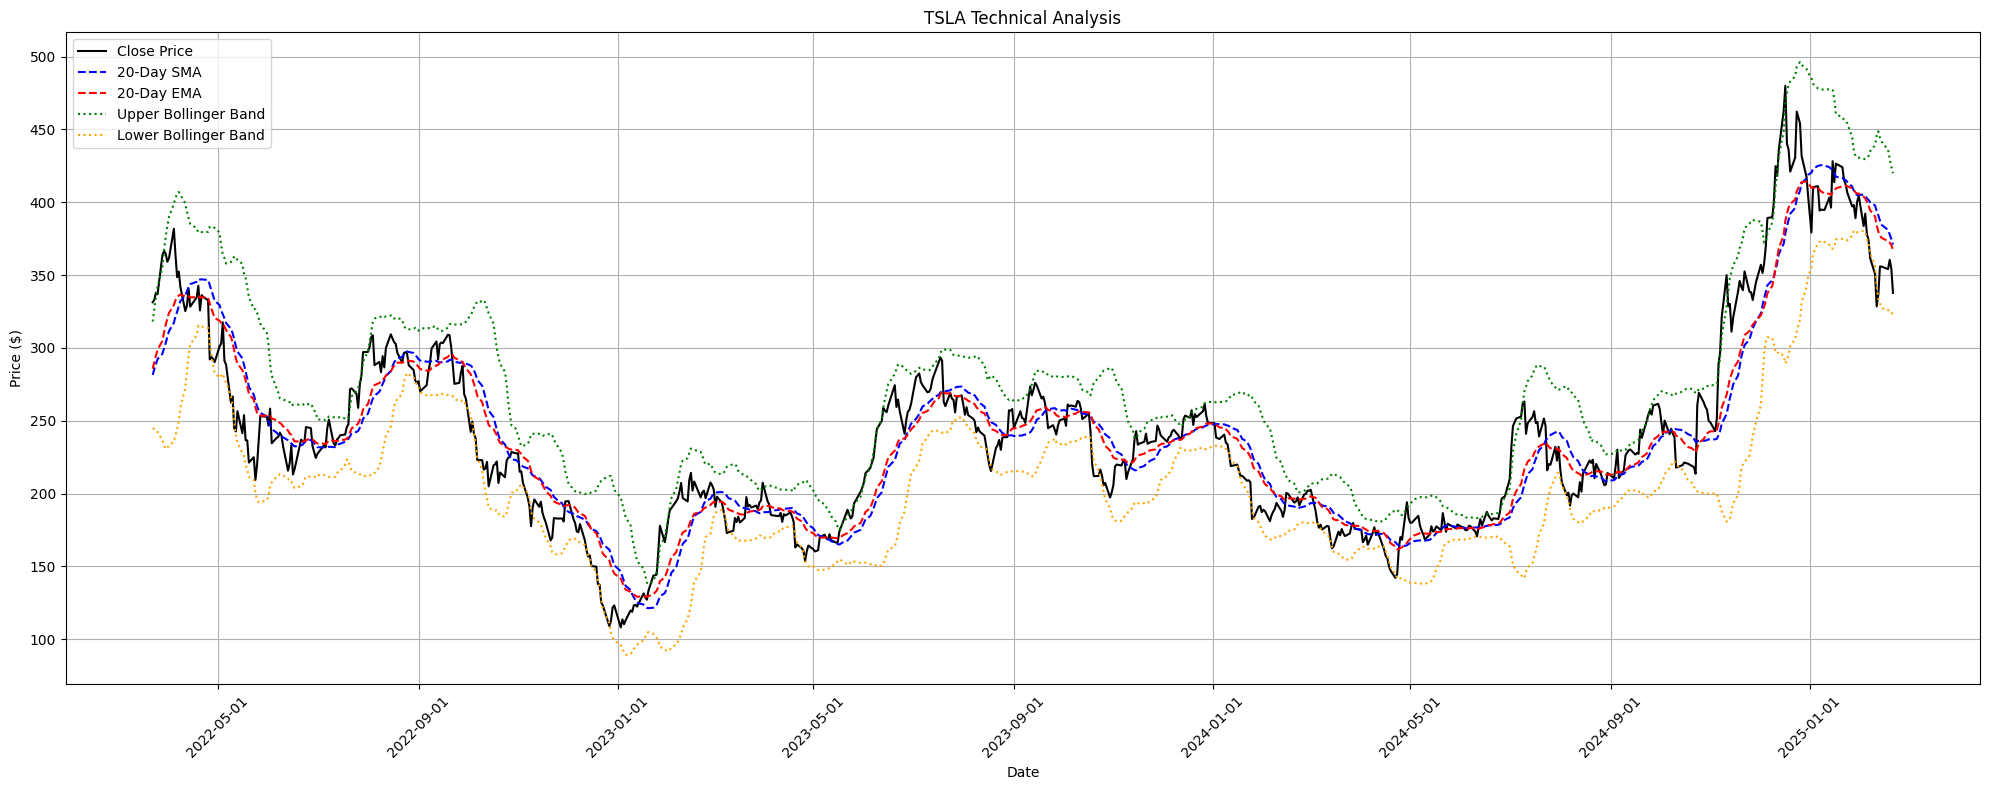

In [10]:
plot_technical_analysis(tsla_df, 'TSLA')

In [11]:
def plot_macd(df, ticker):
    plt.figure(figsize = (20,8))
    plt.plot(df['Date'], df['Close'], label="Close Price", color="black")
    plt.plot(df['Date'], df['MACD'], label="MACD", color="blue")
    plt.plot(df['Date'], df['MACD_Signal'], label="MACD_Signal", color="red", linestyle = "--")

    plt.title(f"{ticker} MACD and Signal Line")
    plt.xlabel("Date")
    plt.ylabel("MACD Value")
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
  

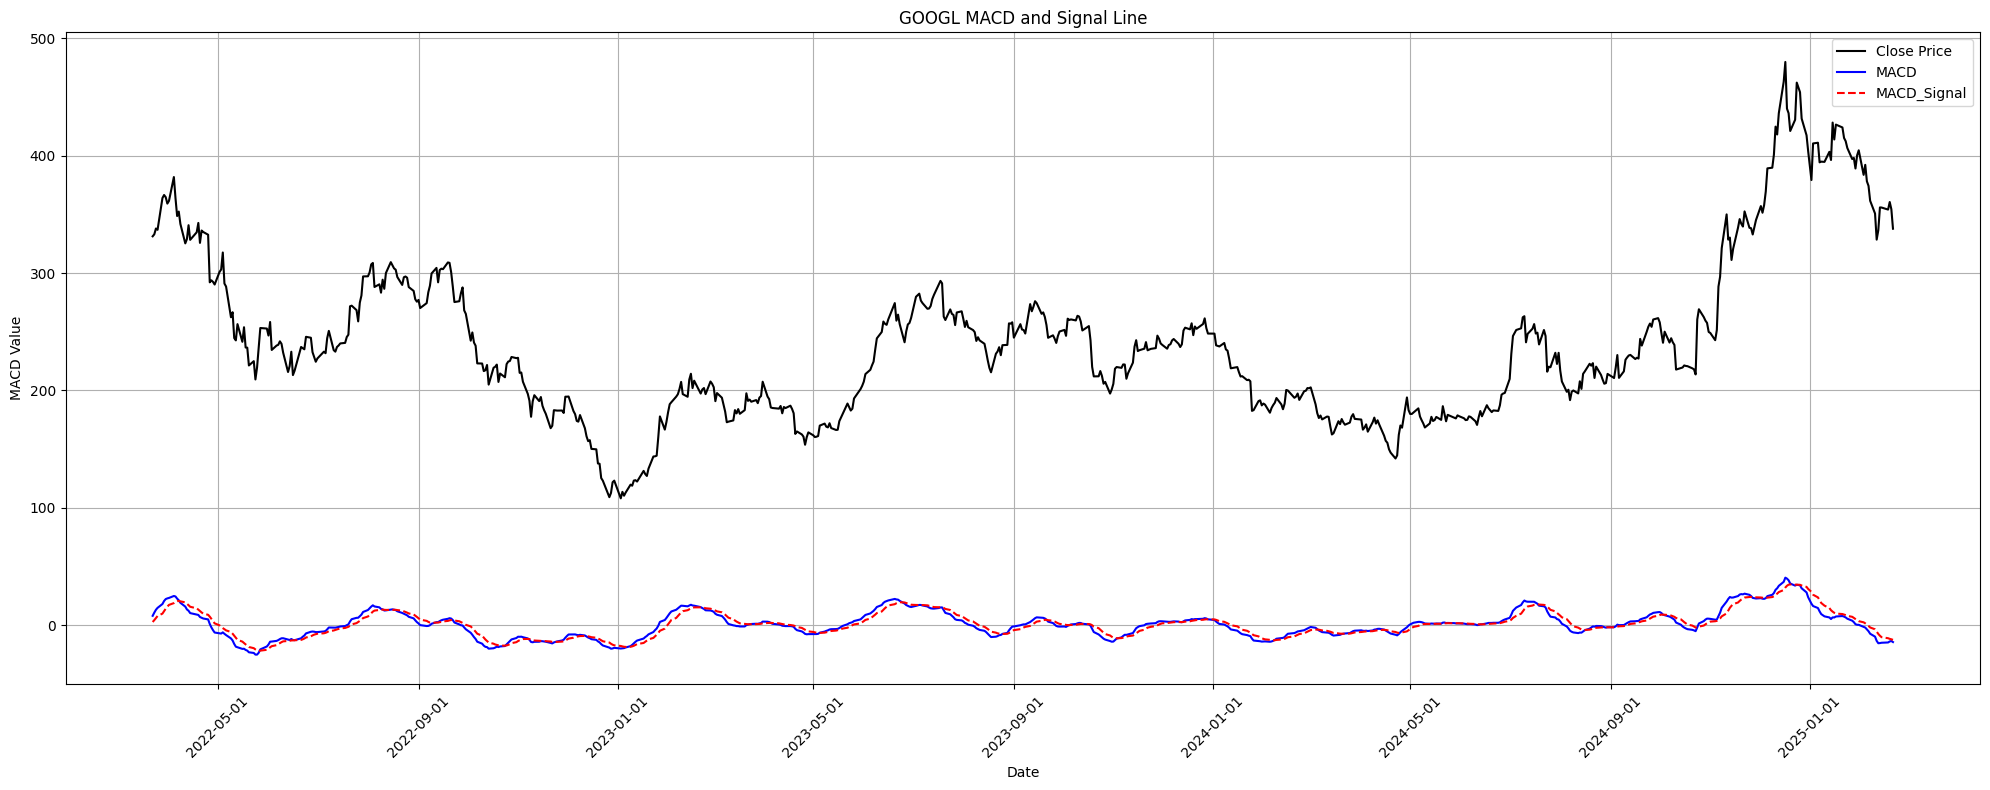

In [12]:
plot_macd(tsla_df, ticker)

When MACD(blue) is above signal line(red), it could be interpreted as time to buy

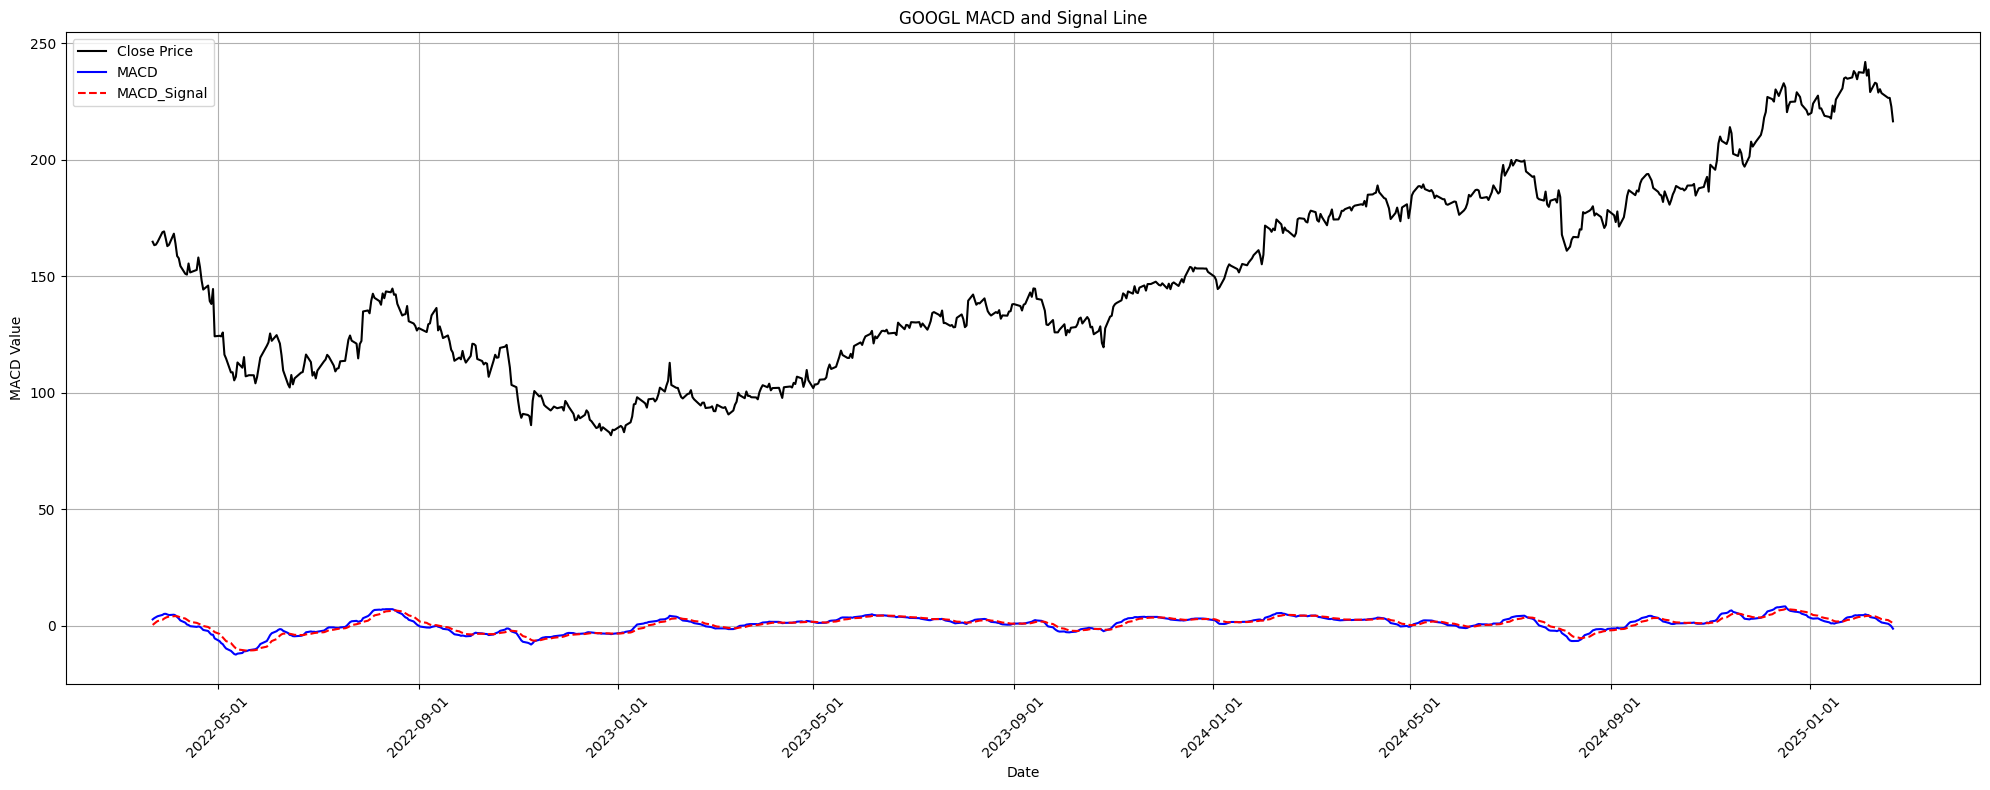

In [13]:
plot_macd(amzn_df, ticker)

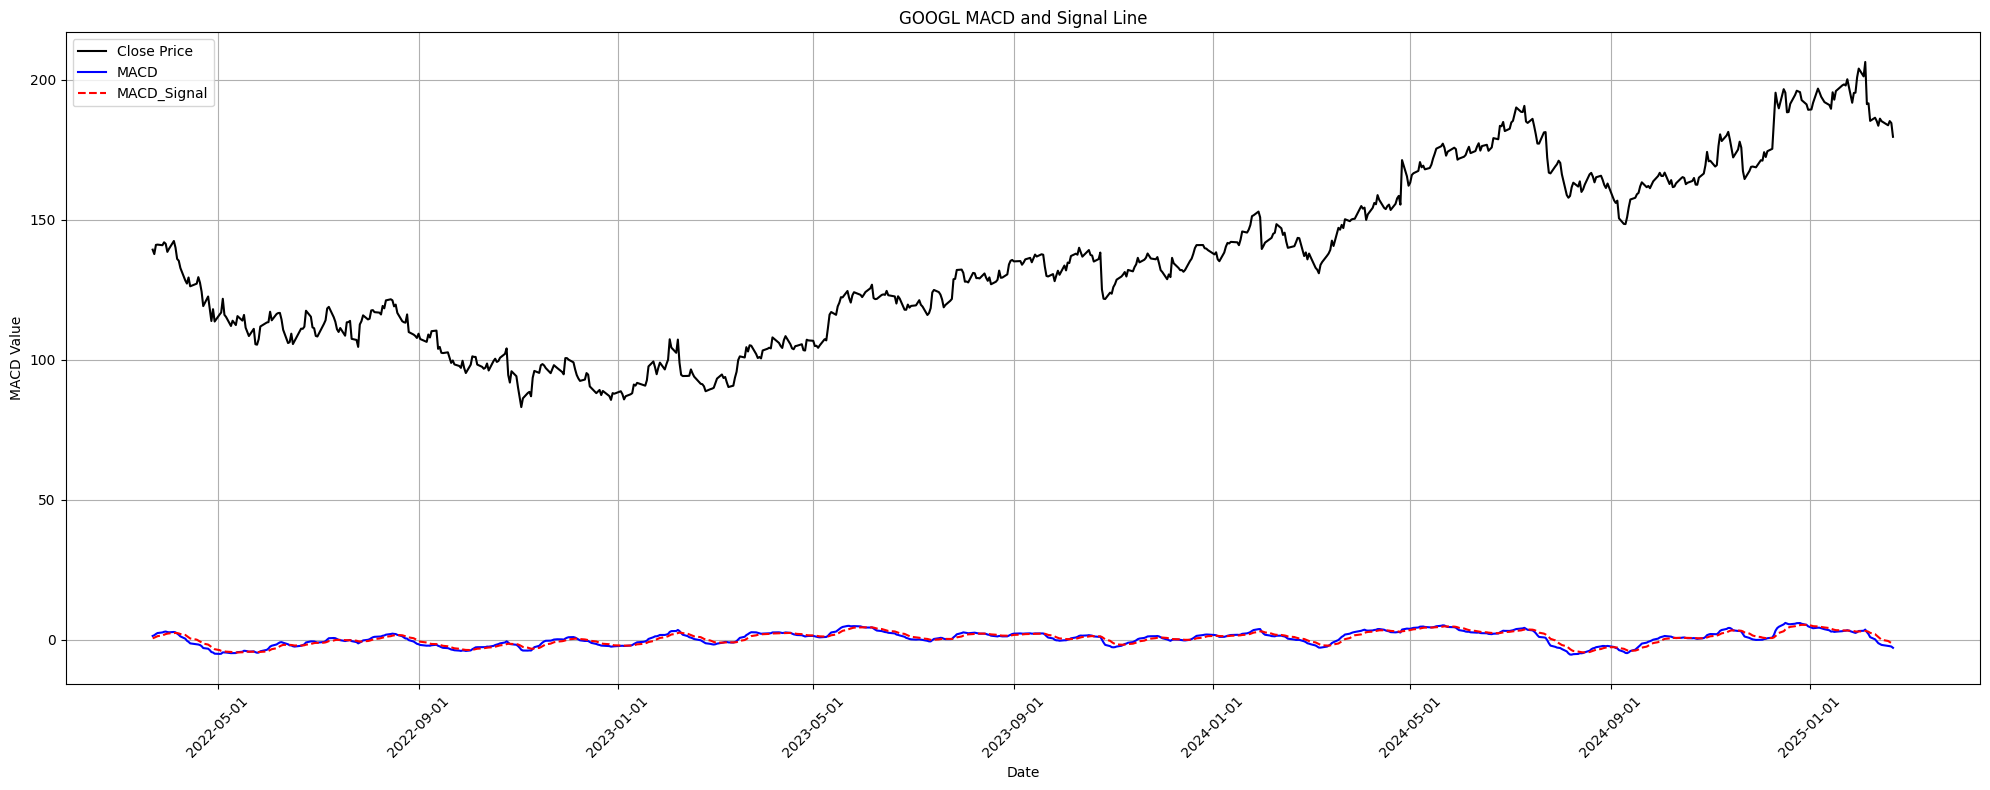

In [14]:
plot_macd(googl_df, ticker)

In [15]:
def plot_returns_distribution(data_dict):
    plt.figure(figsize=(10,6))
    for ticker, df in data_dict.items():
        plt.hist(df['Return'], bins=50, alpha=0.5,label=ticker, density=True)
    plt.title("Distribution of Daily Returns")
    plt.xlabel("Daily Return (%)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


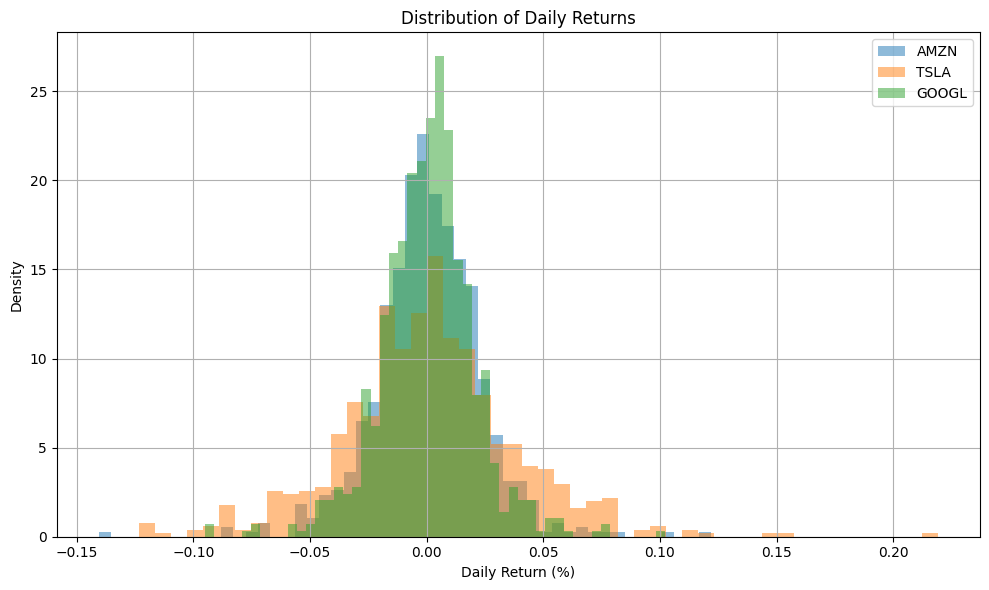

In [16]:
plot_returns_distribution(data_dict)

In [19]:
def analyze_correlations(data_dict):
    returns_df = pd.DataFrame(
        {ticker: df['Return'] for ticker, df in data_dict.items()}
    )
    corr_matrix = returns_df.corr()
    print(corr_matrix)
    return(corr_matrix)

In [20]:
corr_matrix = analyze_correlations(data_dict)

           AMZN      TSLA     GOOGL
AMZN   1.000000  0.440009  0.661807
TSLA   0.440009  1.000000  0.396482
GOOGL  0.661807  0.396482  1.000000
